In [118]:
"""
    Feature engineering in training data and building up the model
"""

'\n    Feature engineering in training data and building up the model\n'

In [185]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [120]:
# Retrieving previous saved data
df_laliga = pd.read_csv("laliga2.csv") 
df_laliga = df_laliga.drop(df_laliga.columns[0], axis=1)
df_laliga = df_laliga.drop(columns=["stats_home","stats_away"], axis=1)

In [121]:
# None values set to 0
df_laliga.fillna(value=0, inplace=True)

In [122]:
# g_diff_home: an integer of the goals difference for home
df_laliga["g_diff_home"] = df_laliga["goals_home"] - df_laliga["goals_away"]
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,8.0,1.0,40%,1.0,0.0,4.0,340.0,250.0,74%,2.0
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,7.0,6.0,46%,1.0,0.0,3.0,380.0,311.0,82%,0.0
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,8.0,2.0,57%,4.0,1.0,3.0,551.0,488.0,89%,0.0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,6.0,3.0,47%,1.0,0.0,3.0,462.0,361.0,78%,0.0
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,10.0,1.0,48%,2.0,0.0,2.0,425.0,347.0,82%,-1.0


In [123]:
# g_diff_away: an integer of the goals difference for away
df_laliga["g_diff_away"] = df_laliga["goals_away"] - df_laliga["goals_home"]
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,1.0,40%,1.0,0.0,4.0,340.0,250.0,74%,2.0,-2.0
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,6.0,46%,1.0,0.0,3.0,380.0,311.0,82%,0.0,0.0
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,2.0,57%,4.0,1.0,3.0,551.0,488.0,89%,0.0,0.0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,3.0,47%,1.0,0.0,3.0,462.0,361.0,78%,0.0,0.0
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,1.0,48%,2.0,0.0,2.0,425.0,347.0,82%,-1.0,1.0


In [124]:
# Set win as 1, draw as 0 and lose as -1
def get_status(r):
    if r["goals_home"] > r["goals_away"]:
        return 1
    elif r["goals_home"] == r["goals_away"]:
        return 0
    else:
        return -1

In [125]:
"""
    Form: last 5 losses
        last 5 wins
        last 5 draws
"""
# Home
df_laliga["wins_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('W'))
df_laliga["loses_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('L'))
df_laliga["draws_home"] = df_laliga["team_home.form"].apply(lambda x: x.count('D'))
# Away
df_laliga["wins_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('W'))
df_laliga["loses_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('L'))
df_laliga["draws_away"] = df_laliga["team_away.form"].apply(lambda x: x.count('D'))

df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,250.0,74%,2.0,-2.0,2,3,0,1,3,1
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,311.0,82%,0.0,0.0,2,3,0,3,1,1
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,488.0,89%,0.0,0.0,2,3,0,5,0,0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,361.0,78%,0.0,0.0,2,3,0,3,0,2
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,Promotion - Europa League (Group Stage),18,...,347.0,82%,-1.0,1.0,2,3,0,2,1,2


In [126]:
# Promotion: either Champions, UEFA Europe, Second division
# Label encoder vs Noramlize unicode encoder
description = np.unique(df_laliga["team_home.description"].astype(str))
enc = preprocessing.LabelEncoder()
enc.fit(description)
df_laliga["team_home.description"] = enc.transform(df_laliga["team_home.description"].astype(str))
df_laliga["team_away.description"] = enc.transform(df_laliga["team_away.description"].astype(str))
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,250.0,74%,2.0,-2.0,2,3,0,1,3,1
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,2,18,...,311.0,82%,0.0,0.0,2,3,0,3,1,1
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,488.0,89%,0.0,0.0,2,3,0,5,0,0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,361.0,78%,0.0,0.0,2,3,0,3,0,2
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,347.0,82%,-1.0,1.0,2,3,0,2,1,2


In [127]:
def score_home(best):
    if best != 0:
        return int(best[0]) - int(best[2])
    return best

In [128]:
def score_away(best):
    if best != 0:
        return int(best[2]) - int(best[0])
    return best

In [129]:
# For best_lose
df_laliga["team_away.stats_home.streaks.best_lose"] = df_laliga["team_away.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_lose"] = df_laliga["team_away.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_away.stats_home.streaks.best_win"] = df_laliga["team_away.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_away.stats_away.streaks.best_win"] = df_laliga["team_away.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,250.0,74%,2.0,-2.0,2,3,0,1,3,1
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,2,18,...,311.0,82%,0.0,0.0,2,3,0,3,1,1
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,488.0,89%,0.0,0.0,2,3,0,5,0,0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,361.0,78%,0.0,0.0,2,3,0,3,0,2
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,347.0,82%,-1.0,1.0,2,3,0,2,1,2


In [130]:
# For best_lose
df_laliga["team_home.stats_home.streaks.best_lose"] = df_laliga["team_home.stats_home.streaks.best_lose"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_lose"] = df_laliga["team_home.stats_away.streaks.best_lose"].apply(score_away)
# For best_win
df_laliga["team_home.stats_home.streaks.best_win"] = df_laliga["team_home.stats_home.streaks.best_win"].apply(score_home)
df_laliga["team_home.stats_away.streaks.best_win"] = df_laliga["team_home.stats_away.streaks.best_win"].apply(score_away)
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,250.0,74%,2.0,-2.0,2,3,0,1,3,1
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,2,18,...,311.0,82%,0.0,0.0,2,3,0,3,1,1
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,488.0,89%,0.0,0.0,2,3,0,5,0,0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,361.0,78%,0.0,0.0,2,3,0,3,0,2
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,347.0,82%,-1.0,1.0,2,3,0,2,1,2


In [131]:
# Posession % to decimal as p_percentage
df_laliga["stats_away.p_percentage"] = df_laliga["stats_away.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.p_percentage"] = df_laliga["stats_home.p_percentage"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_away.possession"] = df_laliga["stats_away.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga["stats_home.possession"] = df_laliga["stats_home.possession"].apply(lambda x: (int(str(x).strip('%'))/100))
df_laliga.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,2.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,250.0,0.74,2.0,-2.0,2,3,0,1,3,1
1,4.0,4.0,533,Villarreal,5,57,10,LLWLW,2,18,...,311.0,0.82,0.0,0.0,2,3,0,3,1,1
2,2.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,488.0,0.89,0.0,0.0,2,3,0,5,0,0
3,0.0,0.0,533,Villarreal,5,57,10,LLWLW,2,18,...,361.0,0.78,0.0,0.0,2,3,0,3,0,2
4,1.0,2.0,533,Villarreal,5,57,10,LLWLW,2,18,...,347.0,0.82,-1.0,1.0,2,3,0,2,1,2


In [132]:
"""
    Following this premise:
    - Away standings from home team aren't relevant
    - Home standings from away team aren't relevant
"""
# Drop away standings
df_premise = df_laliga.drop(df_laliga.filter(regex='team_away.stats_home.').columns, axis=1)
df_premise = df_laliga.drop(df_laliga.filter(regex='team_home.stats_away.').columns, axis=1)
print(df_premise.shape)

(380, 107)


In [133]:
"""
    Here the unseen data will be built as test set
"""
#p37 = [[531, 537], [529, 727], [543, 542], [538, 539], [545, 720], [546, 530], [798, 715], 
       #[541, 533], [548, 536], [532, 540], [542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       #[536, 532], [533, 545], [720, 543]]
p38 = [[542, 529], [530, 548], [540, 538], [715, 531], [537, 541], [539, 546], [727, 798], 
       [536, 532], [533, 545], [720, 543]]

In [134]:
# Getting previous record
ts_laliga = pd.DataFrame()
ts_premise = pd.DataFrame()
for match in p38:
    ts_laliga = ts_laliga.append(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])])
    ts_premise = ts_premise.append(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])])
ts_premise.head()

,goals_home,goals_away,team_home.team.id,team_home.team.name,team_home.rank,team_home.points,team_home.goals_diff,team_home.form,team_home.description,team_home.stats_home.played,...,stats_away.p_accurate,stats_away.p_percentage,g_diff_home,g_diff_away,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
148,0.0,0.0,542,Alaves,15,39,-20,WDLLL,0,18,...,0.0,0.0,0.0,0.0,1,3,1,3,1,1
183,0.0,0.0,530,Atletico Madrid,3,69,24,WWDWD,1,18,...,0.0,0.0,0.0,0.0,3,0,2,2,1,2
283,0.0,0.0,540,Espanyol,20,24,-31,LLLLL,4,18,...,0.0,0.0,0.0,0.0,0,5,0,0,3,2
94,0.0,0.0,715,Granada CF,9,53,3,WLWDW,0,18,...,0.0,0.0,0.0,0.0,3,1,1,2,3,0
152,0.0,0.0,537,Leganes,18,35,-21,WWDWL,4,18,...,0.0,0.0,0.0,0.0,3,1,1,5,0,0


In [135]:
print(ts_laliga.shape)
print(ts_premise.shape)

(10, 124)
(10, 107)


In [136]:
# Remove categorical values as team_away and team_home names, team_home.form
df_laliga = df_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
df_laliga.head()
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

(380, 120)


In [137]:
# Auxiliar for team names
ts_name = pd.DataFrame()
ts_name["team_home.team.name"] = ts_laliga["team_home.team.name"]
ts_name["team_away.team.name"] = ts_laliga["team_away.team.name"]
ts_laliga = ts_laliga.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])
ts_premise = ts_premise.drop(columns=["team_home.team.name","team_away.team.name","team_home.form","team_away.form"])

In [138]:
# This is done before training, after building testing
#for match in p37:
    #df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    #df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
for match in p38:
    df_laliga = df_laliga.drop(df_laliga[(df_laliga["team_home.team.id"]==match[0]) & (df_laliga["team_away.team.id"]==match[1])].index)
    df_premise = df_premise.drop(df_premise[(df_premise["team_home.team.id"]==match[0]) & (df_premise["team_away.team.id"]==match[1])].index)
print(df_laliga.shape)
print(df_premise.shape)

(370, 120)
(370, 103)


In [139]:
# status_home: either win, draw or lose for home team, predicted label
label = []
for index, row in df_laliga.iterrows():
    label.append(get_status(row))
print(label)

[1, 0, 0, 0, -1, -1, 1, 1, 1, 0, 1, 1, -1, 0, -1, 1, 1, -1, 1, -1, 0, 1, 0, -1, 1, -1, 1, -1, -1, 1, 1, -1, 0, -1, 1, -1, 1, 1, 0, 1, 1, 1, 0, 0, -1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, -1, -1, 1, 1, 1, 1, 0, 1, 0, -1, -1, -1, 1, 1, -1, 0, 1, 1, -1, 0, 1, 1, 1, -1, 1, 1, -1, 1, 0, 1, -1, -1, 0, -1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 0, 0, 1, -1, 1, 0, 1, -1, 1, 1, -1, 1, -1, 1, 0, 0, 1, 0, 1, -1, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, -1, -1, -1, 0, -1, 1, 1, -1, 1, 1, -1, 0, 1, 0, 0, 1, 1, -1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, -1, 0, -1, 1, 1, -1, 1, 1, -1, 0, -1, 1, 1, -1, -1, 0, 1, 0, 1, 1, -1, 0, 0, -1, -1, 0, -1, 0, 0, 1, 0, -1, 1, 1, 0, 0, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 0, 0, -1, 0, 1, 1, 1, -1, 0, 1, 0, 1, 1, 0, 0, 1, -1, 0, 1, 1, 0, -1, -1, -1, 1, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, -1, 0, -1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, -1, 1, -1, -1, 0, 0, 1, 1, -

In [140]:
# Missing linear regression for goals_home and goals_away, as goal_diff
df_laliga = df_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
print(df_laliga.shape)
df_premise = df_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_laliga = ts_laliga.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])
ts_premise = ts_premise.drop(columns=["goals_away","goals_home","g_diff_away","g_diff_home"])

(370, 116)


In [141]:
# La liga
# GET avg for team_home.stats_home. team_home.stats_away. team_away.stats_home. team_away.stats_away.
columns_home = df_laliga.filter(regex='^stats_home').columns
#columns_g_home = df_laliga.filter(["goals_home","g_diff_home"]).columns
#columns_home = columns_home.append(columns_g_home)
avg_home_laliga = df_laliga.groupby("team_home.team.id", as_index=True)[columns_home].mean()
avg_home_laliga.head()

,stats_home.s_on_g,stats_home.s_off_g,stats_home.s_in,stats_home.s_out,stats_home.s_total,stats_home.s_blocked,stats_home.fouls,stats_home.corners,stats_home.offside,stats_home.possession,stats_home.c_yellow,stats_home.c_red,stats_home.saves,stats_home.p_total,stats_home.p_accurate,stats_home.p_percentage
team_home.team.id,,,,,,,,,,,,,,,,
529,6.473684,4.894737,14.526316,3.157895,9.315789,5.210526,10.368421,5.315789,2.473684,0.669474,2.421053,0.157895,1.947368,730.789474,652.736842,0.890526
530,4.277778,5.666667,13.611111,3.666667,8.833333,4.777778,13.444444,5.666667,3.000000,0.481667,2.055556,0.111111,2.000000,425.222222,341.055556,0.798333
531,4.421053,5.789474,12.947368,2.736842,8.157895,4.789474,13.578947,5.000000,2.894737,0.503158,2.736842,0.052632,2.368421,417.421053,330.105263,0.781579
532,3.947368,3.789474,10.105263,2.368421,6.789474,3.315789,10.842105,4.526316,2.736842,0.485263,2.000000,0.105263,2.947368,441.000000,362.736842,0.820000
533,5.055556,5.833333,13.777778,2.888889,9.111111,4.666667,12.166667,3.833333,2.555556,0.535556,2.166667,0.000000,3.277778,487.500000,406.222222,0.829444


In [142]:
columns_away = df_laliga.filter(regex='^stats_away').columns
#columns_g_away = df_laliga.filter(["goals_away","g_diff_away"]).columns
#columns_away = columns_home.append(columns_g_away)
avg_away_laliga = df_laliga.groupby("team_away.team.id", as_index=True)[columns_away].mean()
avg_away_laliga.head(10)

,stats_away.s_on_g,stats_away.s_off_g,stats_away.s_in,stats_away.s_out,stats_away.s_total,stats_away.s_blocked,stats_away.fouls,stats_away.corners,stats_away.offside,stats_away.possession,stats_away.c_yellow,stats_away.c_red,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage
team_away.team.id,,,,,,,,,,,,,,,,
529,5.111111,3.111111,11.222222,3.000000,7.333333,3.888889,11.333333,4.611111,1.833333,0.666111,2.555556,0.166667,2.500000,682.166667,601.166667,0.878333
530,3.421053,4.473684,10.368421,2.473684,6.842105,3.526316,13.421053,4.157895,3.157895,0.490000,2.894737,0.052632,2.631579,423.421053,327.789474,0.771053
531,2.777778,3.944444,8.611111,1.888889,4.611111,4.000000,14.055556,4.444444,1.611111,0.458333,2.000000,0.055556,2.500000,364.555556,264.888889,0.720556
532,2.388889,3.666667,7.611111,1.555556,4.611111,3.000000,11.333333,4.222222,2.500000,0.499444,2.333333,0.333333,4.388889,435.888889,354.444444,0.806111
533,4.157895,5.263158,12.315789,2.894737,7.421053,4.894737,13.684211,3.947368,1.157895,0.520000,2.052632,0.000000,2.894737,469.052632,383.157895,0.809474
536,4.578947,4.105263,11.421053,2.736842,7.684211,3.736842,14.052632,4.631579,2.631579,0.561053,2.842105,0.052632,2.157895,498.473684,407.894737,0.813158
537,3.789474,4.210526,10.842105,2.842105,6.105263,4.736842,15.315789,3.842105,2.052632,0.421579,3.578947,0.105263,2.842105,332.789474,239.000000,0.710000
538,3.555556,3.000000,8.388889,1.833333,5.111111,3.277778,12.611111,4.388889,1.666667,0.507778,2.833333,0.055556,3.277778,435.277778,348.333333,0.795000
539,3.473684,4.368421,10.789474,2.947368,6.105263,4.684211,12.473684,4.947368,2.000000,0.483158,2.052632,0.105263,4.421053,376.684211,292.052632,0.770526


In [143]:
i_th = ts_laliga.columns.get_loc("team_home.team.id")
i_ta = ts_laliga.columns.get_loc("team_away.team.id")
for i in range(len(ts_laliga)):
    for index, row in avg_home_laliga.iterrows():
        if ts_laliga.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_laliga)):
    for index, row in avg_away_laliga.iterrows():
        if ts_laliga.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_laliga.columns.get_loc(c)
                    ts_laliga.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_laliga.head(10)

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
148,542,15,39,-20,0,18,7,6,5,20.0,...,2.500000,682.166667,601.166667,0.878333,1,3,1,3,1,1
183,530,3,69,24,1,18,12,5,1,27.0,...,3.444444,459.666667,366.833333,0.792222,3,0,2,2,1,2
283,540,20,24,-31,4,18,2,5,11,15.0,...,3.277778,435.277778,348.333333,0.795000,0,5,0,0,3,2
94,715,9,53,3,0,18,9,3,6,22.0,...,2.500000,364.555556,264.888889,0.720556,3,1,1,2,3,0
152,537,18,35,-21,4,18,5,4,9,15.0,...,1.777778,554.944444,476.444444,0.854444,3,1,1,5,0,0
191,539,12,46,-7,0,18,8,5,5,26.0,...,2.222222,285.388889,168.166667,0.587778,1,2,2,0,3,2
377,727,11,51,-8,0,18,7,6,5,24.0,...,3.555556,378.055556,296.500000,0.771667,3,1,1,2,3,0
259,536,4,67,19,1,18,9,7,2,25.0,...,4.388889,435.888889,354.444444,0.806111,4,0,1,2,2,1
5,533,5,57,10,2,18,8,5,5,33.0,...,2.444444,344.555556,238.388889,0.676111,2,3,0,2,2,1
343,720,16,39,-13,0,18,4,10,4,16.0,...,2.666667,476.777778,396.444444,0.827222,1,3,1,1,3,1


In [144]:
# Premise
# GET avg for team_home.stats_home. team_away.stats_away.
i_th = ts_premise.columns.get_loc("team_home.team.id")
i_ta = ts_premise.columns.get_loc("team_away.team.id")
for i in range(len(ts_premise)):
    for index, row in avg_home_laliga.iterrows():
        if ts_premise.iloc[i,i_th] == index:
            for c in columns_home:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
for i in range(0, len(ts_premise)):
    for index, row in avg_away_laliga.iterrows():
        if ts_premise.iloc[i,i_ta] == index:
            for c in columns_away:
                try:
                    i_c = ts_premise.columns.get_loc(c)
                    ts_premise.iloc[i,i_c] = row[c]
                except:
                    print(index, c)
ts_premise.head(10)

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
148,542,15,39,-20,0,18,7,6,5,20.0,...,2.500000,682.166667,601.166667,0.878333,1,3,1,3,1,1
183,530,3,69,24,1,18,12,5,1,27.0,...,3.444444,459.666667,366.833333,0.792222,3,0,2,2,1,2
283,540,20,24,-31,4,18,2,5,11,15.0,...,3.277778,435.277778,348.333333,0.795000,0,5,0,0,3,2
94,715,9,53,3,0,18,9,3,6,22.0,...,2.500000,364.555556,264.888889,0.720556,3,1,1,2,3,0
152,537,18,35,-21,4,18,5,4,9,15.0,...,1.777778,554.944444,476.444444,0.854444,3,1,1,5,0,0
191,539,12,46,-7,0,18,8,5,5,26.0,...,2.222222,285.388889,168.166667,0.587778,1,2,2,0,3,2
377,727,11,51,-8,0,18,7,6,5,24.0,...,3.555556,378.055556,296.500000,0.771667,3,1,1,2,3,0
259,536,4,67,19,1,18,9,7,2,25.0,...,4.388889,435.888889,354.444444,0.806111,4,0,1,2,2,1
5,533,5,57,10,2,18,8,5,5,33.0,...,2.444444,344.555556,238.388889,0.676111,2,3,0,2,2,1
343,720,16,39,-13,0,18,4,10,4,16.0,...,2.666667,476.777778,396.444444,0.827222,1,3,1,1,3,1


In [145]:
"""
    Three algorithms:
        - SVM
        - PCA
        - Naive Bayes
    To train, both: premise and regular data
"""

'\n    Three algorithms:\n        - SVM\n        - PCA\n        - Naive Bayes\n    To train, both: premise and regular data\n'

In [146]:
results_laliga = ts_laliga.copy()
results_premise = ts_premise.copy()

In [147]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [148]:
# For PCA teams' ids will be removed
pca_laliga = df_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_premise = df_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_laliga = ts_laliga.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)
pca_test_premise = ts_premise.drop(columns=["team_home.team.id","team_away.team.id"], axis=1)

In [246]:
# Standardizing the features
pca_laliga = StandardScaler().fit_transform(pca_laliga)
pca_premise = StandardScaler().fit_transform(pca_premise)
pca_test_laliga = StandardScaler().fit_transform(pca_test_laliga)
pca_test_premise = StandardScaler().fit_transform(pca_test_premise)
# Performs pca to reduce to 10 components
pca_fi = PCA(n_components=3)
pca_laliga_fi = pca_fi.fit_transform(pca_laliga)
pca_premise_fi = pca_fi.fit_transform(pca_premise)
pca_test_laliga_fi = pca_fi.fit_transform(pca_test_laliga)
pca_test_premise_fi = pca_fi.fit_transform(pca_test_premise)
# Performs pca to reduce to 5 components
pca_tw = PCA(n_components=2)
pca_laliga_tw = pca_tw.fit_transform(pca_laliga)
pca_premise_tw = pca_tw.fit_transform(pca_premise)
pca_test_laliga_tw = pca_tw.fit_transform(pca_test_laliga)
pca_test_premise_tw = pca_tw.fit_transform(pca_test_premise)

In [247]:
# Understanding PCA
ex_variance=np.var(pca_premise_fi,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.52729735 0.31527073 0.15743192]


In [248]:
# Select two components
ex_variance=np.var(pca_premise_tw,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.62582166 0.37417834]


In [249]:
pca_premise_tw = pca_tw.fit_transform(pca_premise)
print(pca_tw.components_)

[[ 0.04649024 -0.05015515 -0.05110686  0.01058197 -0.01513873 -0.04596038
   0.01530502  0.04025249 -0.04178399 -0.04252096  0.03031674  0.03132831
  -0.03787378  0.03539378 -0.04805411 -0.01587418  0.02847818 -0.02110445
  -0.03898767 -0.01688492  0.03568095 -0.19445158  0.20352902  0.20525505
  -0.04466622  0.04046052  0.17727613 -0.0464064  -0.16615832  0.15170562
   0.15630006 -0.12281506 -0.12348674  0.16122043 -0.12885069  0.19271135
   0.07362521 -0.13312511  0.07587511  0.13579622  0.06647523 -0.11888783
  -0.04046052  0.17001307  0.04563933 -0.18047432  0.18502115  0.18754191
  -0.14960833 -0.14435337  0.15065883 -0.15895411  0.19271135  0.07362521
  -0.13312511  0.17959889  0.17959889  0.14522708 -0.13919982 -0.07166206
  -0.04141528 -0.07598749 -0.03700345 -0.07254885 -0.0436366   0.02152982
  -0.03900961 -0.01068718 -0.11826924  0.01837483  0.00066726  0.04202874
  -0.07708654 -0.07223873 -0.04265243  0.06649644  0.02017821  0.05329813
   0.02064409  0.0637026   0.01378203 

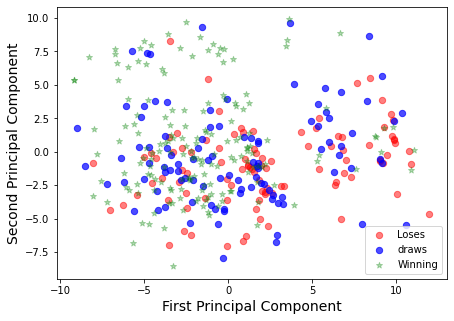

In [250]:
Xax=pca_premise_tw[:,0]
Yax=pca_premise_tw[:,1]
#labels=cancer.target
cdict={-1:'red',1:'green', 0:'blue'}
labl={1:'Winning',-1:'Loses', 0:'draws'}
marker={1:'*',-1:'o', 0:'o'}
alpha={1:.3, -1:.5, 0:.7}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(label):
    ix = np.where(label==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


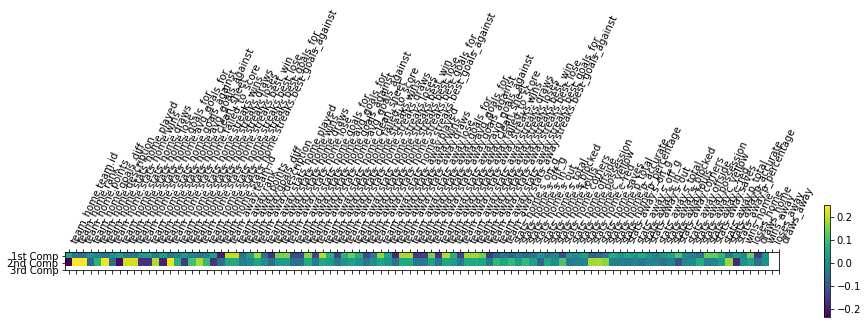

In [251]:
feature_names = df_premise.columns
plt.matshow(pca_tw.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [252]:
# SVM algorithm, using premise
from sklearn.svm import SVC
sv_p = SVC(gamma='auto')
sv_p.fit(pca_premise, label)
results_premise["svm"] = sv_p.predict(pca_test_premise)
results_premise.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,1,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,1,-1,-1,0,-1,0.166667,0.166667,0.666667,Leganes,Real Madrid


In [253]:
print(results_premise["svm"])

148   -1
183    1
283   -1
94     1
152   -1
191    0
377    1
259    1
5      1
343    0
Name: svm, dtype: int64


In [254]:
# SVM, Not using premise
sv = SVC(gamma='auto')
sv.fit(pca_laliga, label)
results_laliga["svm"] = sv.predict(pca_test_laliga)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,1,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Leganes,Real Madrid


In [255]:
print(results_laliga["svm"])

148   -1
183    1
283   -1
94     1
152   -1
191    0
377    1
259    1
5      1
343    0
Name: svm, dtype: int64


In [256]:
# SVM using premise with PCA
sv_p_fi = SVC(gamma='auto')
sv_p_fi.fit(pca_premise_fi, label)
results_premise["svm_pca_fi"] = sv_p_fi.predict(pca_test_premise_fi)
print(results_premise["svm_pca_fi"])
sv_p_tw = SVC(gamma='auto')
sv_p_tw.fit(pca_premise_tw, label)
results_premise["svm_pca_tw"] = sv_p_tw.predict(pca_test_premise_tw)
print(results_premise["svm_pca_tw"])

148    1
183    1
283    1
94     1
152   -1
191    1
377    1
259    1
5      1
343    0
Name: svm_pca_fi, dtype: int64
148   -1
183   -1
283    1
94    -1
152   -1
191    1
377    1
259    1
5      1
343    1
Name: svm_pca_tw, dtype: int64


In [257]:
# SVM, Not using premise with PCA
sv_fi = SVC(gamma='auto')
sv_fi.fit(pca_laliga_fi, label)
results_laliga["svm_pca_fi"] = sv_fi.predict(pca_test_laliga_fi)
print(results_laliga["svm_pca_fi"])
sv_tw = SVC(gamma='auto')
sv_tw.fit(pca_laliga_tw, label)
results_laliga["svm_pca_tw"] = sv_tw.predict(pca_test_laliga_tw)
print(results_laliga["svm_pca_tw"])

148    1
183    1
283    1
94     1
152    1
191    1
377    1
259    0
5      1
343    1
Name: svm_pca_fi, dtype: int64
148    1
183    1
283    0
94     1
152    1
191   -1
377    1
259    1
5      1
343   -1
Name: svm_pca_tw, dtype: int64


In [258]:
df_premise.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,stats_away.saves,stats_away.p_total,stats_away.p_accurate,stats_away.p_percentage,wins_home,loses_home,draws_home,wins_away,loses_away,draws_away
0,533,5,57,10,2,18,8,5,5,33.0,...,4.0,340.0,250.0,0.74,2,3,0,1,3,1
1,533,5,57,10,2,18,8,5,5,33.0,...,3.0,380.0,311.0,0.82,2,3,0,3,1,1
2,533,5,57,10,2,18,8,5,5,33.0,...,3.0,551.0,488.0,0.89,2,3,0,5,0,0
3,533,5,57,10,2,18,8,5,5,33.0,...,3.0,462.0,361.0,0.78,2,3,0,3,0,2
4,533,5,57,10,2,18,8,5,5,33.0,...,2.0,425.0,347.0,0.82,2,3,0,2,1,2


In [259]:
# Naive Bayes, using premise
from sklearn.naive_bayes import GaussianNB
gnb_p = GaussianNB()
gnb_p.fit(df_premise, label)
results_premise["nb"] = gnb_p.predict(ts_premise)

In [260]:
# Regular NB
gnb = GaussianNB()
gnb_p.fit(df_laliga, label)
results_laliga["nb"] = gnb_p.predict(ts_laliga)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,0,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Leganes,Real Madrid


In [261]:
# Add ids # NO EN PCA
pca_laliga_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_laliga_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_premise_fi['team_home.team.id'] = df_laliga['team_home.team.id'].values
pca_premise_fi['team_away.team.id'] = df_laliga['team_away.team.id'].values
pca_test_laliga_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_laliga_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values
pca_test_premise_fi['team_home.team.id'] = ts_laliga['team_home.team.id'].values
pca_test_premise_fi['team_away.team.id'] = ts_laliga['team_away.team.id'].values

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [262]:
# NB using premise with PCA
gnb_p_fi = GaussianNB()
gnb_p_fi.fit(pca_premise_fi, label)
results_premise["nb_pca_fi"] = gnb_p_fi.predict(pca_test_premise_fi)
gnb_p_tw = GaussianNB()
gnb_p_tw.fit(pca_premise_tw, label)
results_premise["nb_pca_tw"] = gnb_p_tw.predict(pca_test_premise_tw)
results_premise.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,-1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,-1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,1,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,-1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,-1,-1,-1,-1,-1,0.166667,0.166667,0.666667,Leganes,Real Madrid


In [263]:
# NB, Not using premise with PCA
gnb_fi = GaussianNB()
gnb_fi.fit(pca_laliga_fi, label)
results_laliga["nb_pca_fi"] = gnb_fi.predict(pca_test_laliga_fi)
gnb_tw = GaussianNB()
gnb_tw.fit(pca_laliga_tw, label)
results_laliga["nb_pca_tw"] = gnb_tw.predict(pca_test_laliga_tw)
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,0,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Leganes,Real Madrid


In [264]:
def prob(x, result):
    count = 0
    result = float(result)
    if x["svm"] == result:
        count = count + 1
    if x["svm_pca_fi"] == result:
        count = count + 1
    if x["svm_pca_tw"] == result:
        count = count + 1
    if x["nb"] == result:
        count = count + 1
    if x["nb_pca_fi"] == result:
        count = count + 1
    if x["nb_pca_tw"] == result:
        count = count + 1
    return count/6

In [265]:
# Probability
win_result = '1'
lose_result = '-1'
draw_result = '0'
results_laliga["w_p"] = results_laliga.apply(prob, args=(win_result), axis=1)
results_laliga["d_p"] = results_laliga.apply(prob, args=(draw_result), axis=1)
results_laliga["l_p"] = 1 - (results_laliga["w_p"] + results_laliga["d_p"])
results_laliga.head()

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,0,-1,1,1,0.500000,0.166667,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,1,0,1,1,0.833333,0.166667,0.000000,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,1,1,-1,-1,-1,0.333333,0.000000,0.666667,Leganes,Real Madrid


In [266]:
results_premise["w_p"] = results_premise.apply(prob, args=(win_result), axis=1)
results_premise["d_p"] = results_premise.apply(prob, args=(draw_result), axis=1)
results_premise["l_p"] = 1 - (results_premise["w_p"] + results_premise["d_p"])
results_premise.head(10)

,team_home.team.id,team_home.rank,team_home.points,team_home.goals_diff,team_home.description,team_home.stats_home.played,team_home.stats_home.wins,team_home.stats_home.draws,team_home.stats_home.lose,team_home.stats_home.goals_for,...,svm_pca_fi,svm_pca_tw,nb,nb_pca_fi,nb_pca_tw,w_p,d_p,l_p,team_home.team.name,team_away.team.name
148,542,15,39,-20,0,18,7,6,5,20.0,...,1,-1,-1,-1,-1,0.166667,0.000000,0.833333,Alaves,Barcelona
183,530,3,69,24,1,18,12,5,1,27.0,...,1,-1,1,1,1,0.833333,0.000000,0.166667,Atletico Madrid,Real Sociedad
283,540,20,24,-31,4,18,2,5,11,15.0,...,1,1,-1,1,1,0.666667,0.000000,0.333333,Espanyol,Celta Vigo
94,715,9,53,3,0,18,9,3,6,22.0,...,1,-1,0,1,1,0.666667,0.166667,0.166667,Granada CF,Athletic Club
152,537,18,35,-21,4,18,5,4,9,15.0,...,-1,-1,-1,-1,-1,0.000000,0.000000,1.000000,Leganes,Real Madrid
191,539,12,46,-7,0,18,8,5,5,26.0,...,1,1,-1,1,1,0.666667,0.166667,0.166667,Levante,Getafe
377,727,11,51,-8,0,18,7,6,5,24.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Osasuna,Mallorca
259,536,4,67,19,1,18,9,7,2,25.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Sevilla,Valencia
5,533,5,57,10,2,18,8,5,5,33.0,...,1,1,1,1,1,1.000000,0.000000,0.000000,Villarreal,Eibar
343,720,16,39,-13,0,18,4,10,4,16.0,...,0,1,0,1,1,0.500000,0.500000,0.000000,Valladolid,Real Betis


In [267]:
# Adding name columns
results_laliga["team_home.team.name"] = ts_name["team_home.team.name"]
results_laliga["team_away.team.name"] = ts_name["team_away.team.name"]
results_premise["team_home.team.name"] = ts_name["team_home.team.name"]
results_premise["team_away.team.name"] = ts_name["team_away.team.name"]

In [268]:
results_laliga.to_csv('laliga_p38.csv')
results_premise.to_csv('premise_p38.csv')